In [ ]:
import sys 
sys.path.append('../Data_storage/')
sys.path.append('../Code_Base')

In [2]:
import os

In [3]:
from essential_imports import *


import pandas as pd
import numpy as np
import matplotlib as plt
import pandas_profiling
import warnings



In [41]:
from coin_information import *

In [67]:
from statsmodels.tsa.stattools import adfuller 

In [ ]:
from matplotlib.pylab import rcParams 

In [4]:
warnings.filterwarnings('ignore')

## ML DS modules

In [66]:
from statsmodels.tsa.arima_model import ARIMA

In [7]:
ETH = []
for myf in open('../Data_storage/ETC_30min_Freq.txt'):
    ETH.append(myf.replace('\n',''))

In [8]:
ETH_Data = []
for E in ETH:
    E_Temp = pd.read_csv('../Data_storage/Coin_Data_30min/{0}.csv'.format(E))
    ETH_Data.append(E_Temp)

In [9]:
ETH_Data = pd.concat(ETH_Data)

In [11]:
ETH_Data['datetime_real'] = ETH_Data['date'].apply(lambda x: datetime.fromtimestamp(x))

In [12]:
ETH_Data = ETH_Data[ETH_Data['date'] != 0]

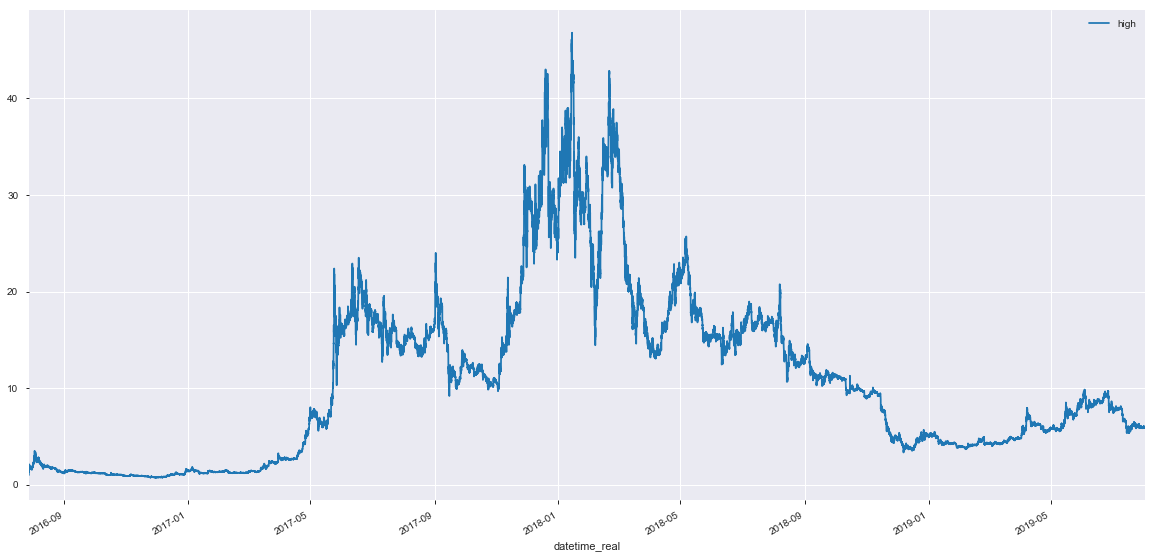

In [13]:
ETH_Data[['high','datetime_real']].set_index('datetime_real').plot(figsize= (20,10))

In [130]:
BTC = []
for myf in open('../Data_storage/BTC_30min_Freq.txt'):
    BTC.append(myf.replace('\n',''))

In [131]:
BTC_Data = []
for E in BTC:
    coin_Temp = pd.read_csv('../Data_storage/Coin_Data_30min/{0}.csv'.format(E))
    BTC_Data.append(coin_Temp)

In [132]:
BTC_Data = pd.concat(BTC_Data)

In [133]:
BTC_Data['datetime_real'] = BTC_Data['date'].apply(lambda x: datetime.fromtimestamp(x))

In [134]:
BTC_Data = BTC_Data[BTC_Data['date'] != 0]

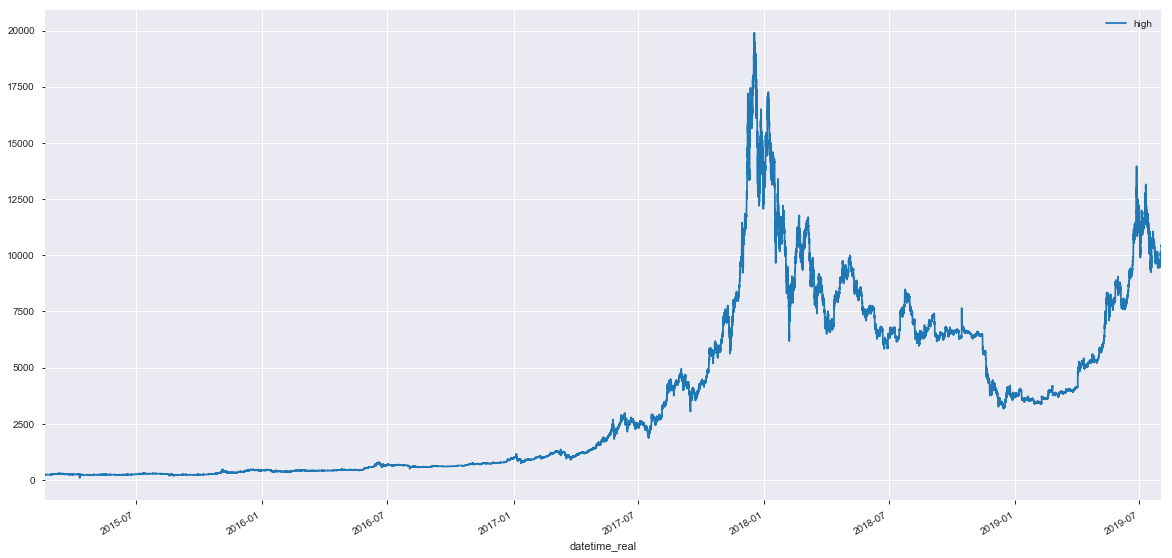

In [135]:
BTC_Data[['high','datetime_real']].set_index('datetime_real').plot(figsize= (20,10))

In [136]:
BTC_Data = BTC_Data.drop(columns = 'Unnamed: 0')

In [137]:
BTC_Data= BTC_Data.drop_duplicates()

In [138]:
pandas_profiling.ProfileReport(BTC_Data)

KeyboardInterrupt: 

In [140]:
def test_stationarity(timeseries):
        #Determing rolling statistics
    rolmean = timeseries.rolling(48).mean()# pd.rolling_mean(timeseries, window=24) # 24 hours on each day
    rolstd = timeseries.rolling(48).std()# pd.rolling_std(timeseries, window=24)
        #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
        #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [141]:
BTC_Data.tail()

,close,date,high,low,open,quoteVolume,volume,weightedAverage,datetime_real
2587,10411.843688,1564695000,10412.543688,10363.761065,10371.040000,7.569329,78616.453010,10386.185539,2019-08-01 22:30:00
2588,10369.303684,1564696800,10425.018269,10362.000000,10410.000000,7.037109,73281.852989,10413.630111,2019-08-01 23:00:00
2589,10365.000000,1564698600,10378.070000,10362.000000,10375.000000,0.635737,6592.862424,10370.417598,2019-08-01 23:30:00
2590,10393.371188,1564700400,10417.000000,10363.500000,10365.000000,16.803258,174840.979376,10405.183378,2019-08-02 00:00:00
2591,10390.600000,1564702200,10391.801814,10365.700000,10391.365263,2.258918,23429.361882,10371.940103,2019-08-02 00:30:00


In [142]:
rcParams['figure.figsize'] = 20,10

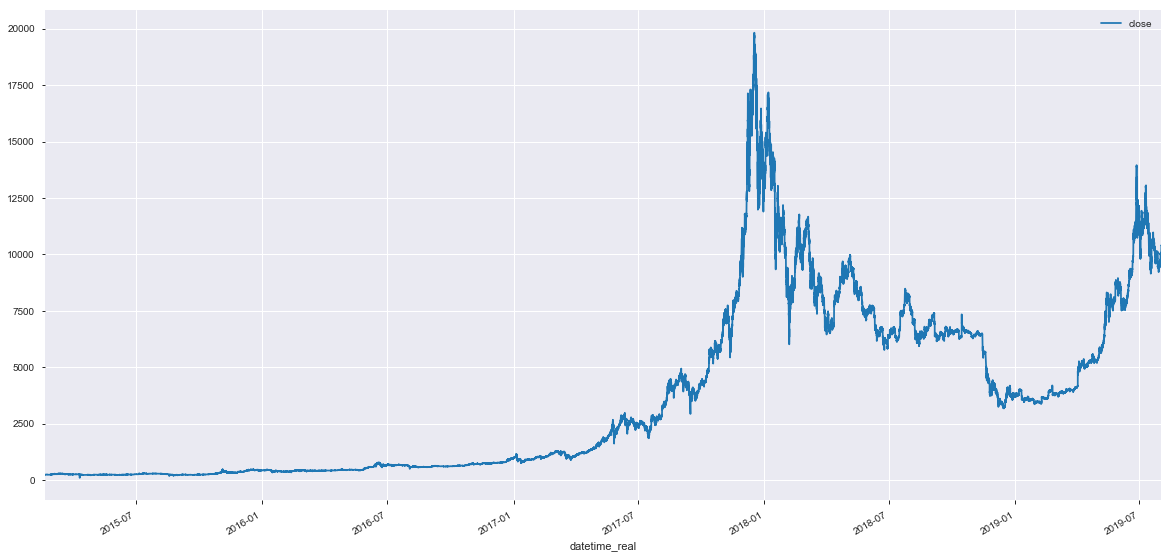

In [143]:
BTC_Data[['close','datetime_real']].set_index('datetime_real').plot()

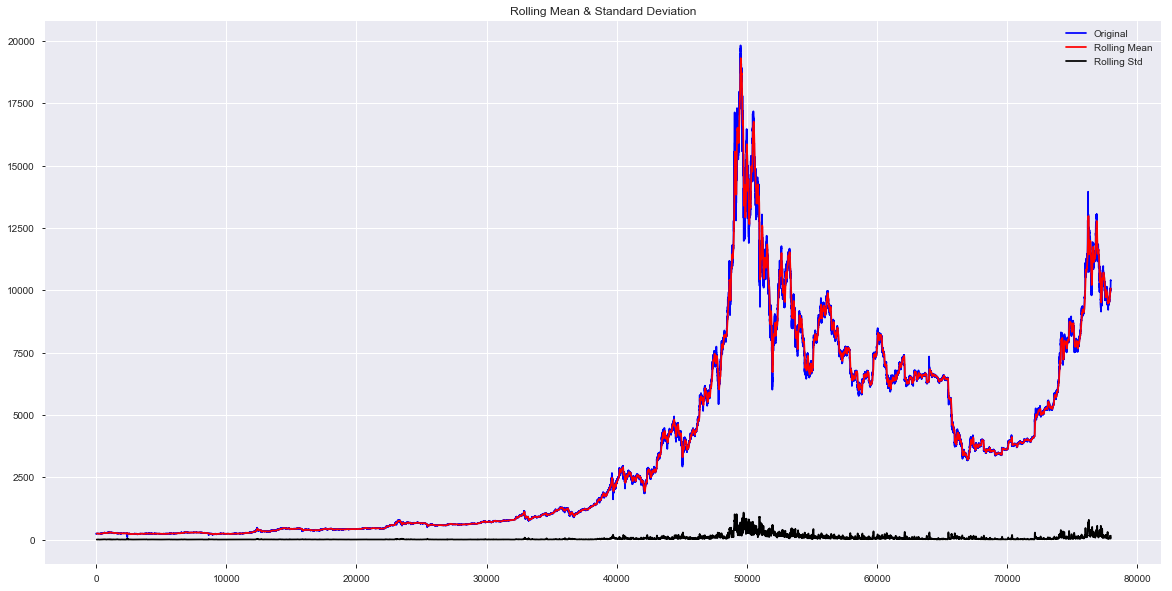

Results of Dickey-Fuller Test:
Test Statistic                    -1.034633
p-value                            0.740424
#Lags Used                        64.000000
Number of Observations Used    77885.000000
Critical Value (1%)               -3.430434
Critical Value (5%)               -2.861577
Critical Value (10%)              -2.566790
dtype: float64


In [180]:
#test_stationarity(train_original['Count'])
test_stationarity(BTC_Data['close'].reset_index()['close'])